# Introdução

O presente projeto tem como objetivo aplicar técnicas de **Deep Learning** para resolver um problema de **classificação multiclasse** utilizando redes neurais artificiais.  
O dataset escolhido, oriundo do **MABe Challenge – Social Action Recognition in Mice**, contém informações de vídeos de camundongos e respectivas anotações de comportamento. O foco é prever a **ação** realizada a cada Frame dos vídeos a partir dos dados fornecidos.
Por questões de processamento necessário e tempo para realização do projeto, este foi simplificado para predição da **ação predominante** em cada vídeo analisado do dataset.

## Grupo
**Caio Ortega Boa** , **Pedro Toledo Piza Civita**, **Gabriel Mendonça de Mello Hermida**

---

# Roadmap do Projeto

O desenvolvimento foi conduzido nas seguintes etapas:

1. **Definição do Modelo MLP e Funções Úteis**  
   - Scaler utilizado para normalização das features.  
   - Definição da arquitetura de MLP utilizada.  
   - Funções úteis utilizadas no projeto.  

2. **Análise Exploratória dos Dados (EDA)**  
   - Inspeção das variáveis disponíveis no dataset.  
   - Verificação da distribuição das classes-alvo e balanceamento do conjunto.  
   - Identificação de valores faltantes, inconsistências e outliers.  

3. **Tratamento Inicial dos Dados**  
   - Pipeline de tratamento para dados do projeto.  
   - Normalização ou padronização de atributos numéricos.  
   - Codificação das variáveis categóricas para uso no modelo.  
   - Geração de features.
   - Tratamento de valores faltantes.  

4. **Treinamento do Modelo para Predição de *Unique Actions***  
   - Primeira fase de treinamento direcionada a prever o número de ações distintas (unique actions) presentes no vídeo.  
   - Registro do desempenho com métricas quantitativas.
   - Implementação do output do modelo como features para predição futura.  

5. **Treinamento do Modelo Final**  
   - Construção do modelo definitivo para prever a **ação predominante**.  
   - Análise de curvas de erro (loss e accuracy) para verificar convergência.  

---

## Descrição do Dataset: MABe / CalMS21 — Mouse Behavior Detection

A competição utilizada como fonte deste projeto é **MABe — Mouse Behavior Detection** publicada no Kaggle:  
https://www.kaggle.com/competitions/MABe-mouse-behavior-detection/data

A base de dados é derivada do **dataset CalMS21 (Caltech Mouse Social Interactions 2021)**, utilizado no desafio MABe de reconhecimento de comportamentos sociais entre camundongos.

---

### Principais características

| Item | Descrição |
|---|---|
| **Tipo de problema** | Classificação multiclasse / frame-level behavior detection |
| **Domínio** | Comportamento social de camundongos a partir de dados de pose estimada |
| **Formato dos dados** | Sequências (vídeos) compostas por frames, onde cada frame contém: <br> - Coordenadas 2D de **7 keypoints** para cada um dos dois animais (residente e intruso) <br> - Anotações de comportamento (quando disponíveis) |
| **Escala / amplitude** | Mais de **6 milhões de frames não anotados** (dados de pose apenas), e mais de **1 milhão de frames anotados** para comportamentos sociais. - Considerando apenas o dataset de train, esse possui um shape de 8790, 38. |
| **Licença / distribuição** | O CalMS21 é distribuído sob **Creative Commons Attribution-NonCommercial-ShareAlike (CC-BY-NC-SA)**. |

---

### Justificativa para escolha deste dataset

- **Complexidade suficiente**: o dataset oferece um desafio realista, com muitas amostras e múltiplas classes, superando o mínimo exigido (≥ 1.000 amostras e ≥ 5 features).  
- **Originalidade e impacto**: não é uma base trivial ou já trivialmente explorada em cursos.  

# Arquitetura Inicial Cogitada

No início do projeto foi delineada uma arquitetura mais ambiciosa, com o objetivo de explorar ao máximo o potencial do dataset. A proposta envolvia múltiplas etapas integradas:

1. **Predição de Unique Actions**  
   - Modelo voltado para estimar o número de ações distintas registradas em cada vídeo.  

2. **Montagem do Dataset Frame a Frame**  
   - Estruturação detalhada dos dados em nível de quadro (frame), preservando informações de cada instante temporal.  

3. **Predição Frame a Frame da Ação Realizada**  
   - Treinamento de um modelo específico para classificar a ação em cada frame individualmente, capturando a dinâmica temporal.  

4. **Treinamento de Modelo para Prever quais Ratos Participaram da Ação**  
   - Identificação de quais indivíduos estavam envolvidos em cada ação observada, enriquecendo a granularidade das anotações.  

5. **Montagem do Dataset Final**  
   - Integração dos resultados anteriores em uma estrutura completa: para cada frame, indicar **qual rato realizou qual ação sobre qual outro rato**.  

# Simplificação do Projeto

Devido a limitações de tempo e capacidade computacional, a arquitetura inicial precisou ser simplificada. O escopo foi ajustado para duas tarefas principais:

1. **Predição de Unique Actions**  
   - Modelo voltado apenas para prever o número de ações distintas em cada vídeo, sem granularidade quadro a quadro.  

2. **Predição da Ação Mais Realizada no Vídeo**  
   - Treinamento de um modelo final para identificar a ação predominante em cada vídeo, reduzindo o problema a uma classificação multiclasse direta.  

# Definição do Modelo MLP e Funções Úteis

Nesta etapa do projeto foi construída a base para o modelo de classificação: um **Multi-Layer Perceptron (MLP)** implementado do zero em Python com `NumPy`.  
O objetivo é compreender todos os passos envolvidos no treinamento de uma rede neural, desde a preparação dos dados até o cálculo das métricas finais.

---

## Preparação do Ambiente

Foram importadas bibliotecas fundamentais para análise e manipulação de dados (`numpy`, `pandas`), visualização (`matplotlib`, `seaborn`), além de configurações para melhorar a exibição de tabelas no notebook.  

---

## Funções Auxiliares

Para viabilizar o treinamento e avaliação do modelo, foram definidas funções essenciais:

- **Normalização dos dados**: implementação do escalamento de variáveis para o intervalo [-1, 1], garantindo melhor estabilidade durante o treinamento da rede para `tanh`.  
- **Funções de ativação**: `tanh` e `softmax`, além de suas derivadas, necessárias para a propagação direta e retropropagação.  
- **Função de perda**: *Cross-Entropy Loss*, apropriada para classificação multiclasse, calculando o erro entre as probabilidades previstas e os rótulos verdadeiros.  
- **Métricas de avaliação**: `accuracy_score`, `f1_score`, `precision`, `recall` e `confusion_matrix` para medir a taxa de acertos do modelo.  
- **Divisão do dataset**: função `train_test_split`, que embaralha os dados e separa em treino e teste, garantindo reprodutibilidade via `random_state`.  
- **Inicialização de pesos**: método `xavier_init`, que favorece uma inicialização de pesos para propagação de gradiente mais estável em redes profundas.  
- **Codificação de rótulos**: função `one_hot`, que converte classes inteiras em vetores one-hot para uso na função de perda.

---

## Estrutura do MLP

A classe `MLP` reúne todos os componentes do modelo:

- **Hiperparâmetros configuráveis**: dimensões de entrada e saída, número e tamanho das camadas escondidas, taxa de aprendizado (`lr`), número de épocas, tamanho de lote (`batch_size`), regularização L2 e semente aleatória para reprodutibilidade.  
- **Inicialização de parâmetros**: pesos e vieses são inicializados com o método de Xavier, garantindo maior eficiência no início do treino.  
- **Forward pass**: realiza a propagação dos dados pelas camadas, aplicando `tanh` nas camadas escondidas e `softmax` na saída para gerar probabilidades.  
- **Backward pass**: implementa a retropropagação do erro, atualizando gradientes para pesos e vieses, com suporte a regularização L2.  
- **Função de atualização**: aplica descida do gradiente para refinar os parâmetros a cada iteração.  
- **Treinamento (`fit`)**: organiza o loop de épocas, realiza o embaralhamento dos dados, treino em mini-batches, cálculo da função de perda e registro histórico de loss e accuracy.  
- **Predição**: métodos para retornar probabilidades (`predict_proba`), scores lineares (`decision_function`) e rótulos finais (`predict`).

---

In [35]:
from __future__ import annotations

from pathlib import Path
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

sns.set_theme(style='whitegrid', context='notebook')
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 120)


In [36]:
# -----------------------------
# Ativações e derivadas
# -----------------------------
def tanh(z: np.ndarray) -> np.ndarray:
    return np.tanh(z)

def dtanh_from_a(a: np.ndarray) -> np.ndarray:
    return 1.0 - a**2

def softmax(Z: np.ndarray, axis: int = 0) -> np.ndarray:
    """
    Z: (K, m) -> aplica softmax por coluna (axis=0).
    Retorna prob. por classe, colunas somam 1.
    """
    Z_shift = Z - np.max(Z, axis=axis, keepdims=True)
    e = np.exp(Z_shift)
    return e / np.sum(e, axis=axis, keepdims=True)

def cross_entropy(y_true_oh: np.ndarray, y_prob: np.ndarray, eps: float = 1e-12) -> float:
    """
    y_true_oh: (m, K) one-hot
    y_prob   : (m, K) probabilidades (softmax)
    """
    y_prob = np.clip(y_prob, eps, 1.0 - eps)
    return float(-np.mean(np.sum(y_true_oh * np.log(y_prob), axis=1)))


# -----------------------------
# Métricas de avaliação
# -----------------------------

def accuracy_score(y_true: np.ndarray, y_pred_labels: np.ndarray) -> float:
    return float(np.mean(y_true == y_pred_labels))

def precision_recall_f1(y_true, y_pred, labels=None):
    """Calcula precisão, recall e F1 por classe do zero"""
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    metrics = {}
    for label in labels:
        tp = np.sum((y_pred == label) & (y_true == label))
        fp = np.sum((y_pred == label) & (y_true != label))
        fn = np.sum((y_pred != label) & (y_true == label))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1        = 2*precision*recall/(precision+recall) if (precision+recall) > 0 else 0.0
        metrics[label] = {"precision": precision, "recall": recall, "f1": f1}
    return metrics

def confusion_matrix_true(y_true, y_pred, labels=None):
    if labels is None:
        labels = np.unique(np.concatenate([y_true, y_pred]))
    cm = pd.DataFrame(0, index=labels, columns=labels)
    for yt, yp in zip(y_true, y_pred):
        cm.loc[yt, yp] += 1
    return cm


# -----------------------------
# Divisão treino/validação/teste
# -----------------------------

def train_test_split(
    X: np.ndarray,
    y: np.ndarray,
    test_size: float = 0.15,
    val_size: float = 0.15,
    random_state: int = 42,
):
    """Divide os dados em conjuntos de treino, validacao e teste (70/15/15 por padrao)."""
    if not (0.0 < test_size < 1.0) or not (0.0 < val_size < 1.0):
        raise ValueError('test_size e val_size devem estar entre 0 e 1.')
    if test_size + val_size >= 1.0:
        raise ValueError('A soma de test_size e val_size deve ser inferior a 1.')

    rng = np.random.default_rng(random_state)
    m = X.shape[0]
    idx = rng.permutation(m)

    m_test = max(1, int(round(test_size * m)))
    m_val = max(1, int(round(val_size * m)))

    total_requested = m_test + m_val
    if total_requested >= m:
        m_test = max(1, int(np.floor(test_size * m)))
        m_val = max(1, int(np.floor(val_size * m)))
        total_requested = m_test + m_val
        if total_requested >= m:
            raise ValueError('Nao ha exemplos suficientes para o particionamento desejado.')

    test_idx = idx[:m_test]
    val_idx = idx[m_test:m_test + m_val]
    train_idx = idx[m_test + m_val:]

    if train_idx.size == 0:
        raise ValueError('Conjunto de treino vazio; ajuste test_size/val_size.')

    return (
        X[train_idx],
        X[val_idx],
        X[test_idx],
        y[train_idx],
        y[val_idx],
        y[test_idx],
    )

# -----------------------------
# Inicialização do pesos
# -----------------------------

def xavier_init(fan_in: int, fan_out: int, rng: np.random.Generator) -> np.ndarray:
    std = np.sqrt(2.0 / (fan_in + fan_out))
    return rng.normal(0.0, std, size=(fan_out, fan_in))

# -----------------------------
# One Hot Encoding
# -----------------------------

def one_hot(y: np.ndarray, K: int) -> np.ndarray:
    """
    y: (m,) com rótulos inteiros [0..K-1]
    retorna: (m, K) one-hot
    """
    m = y.shape[0]
    Y = np.zeros((m, K), dtype=float)
    Y[np.arange(m), y.astype(int)] = 1.0
    return Y

In [37]:
class MLP:
    def __init__(
        self,
        input_dim: int,
        hidden_layers: List[int] = [16, 16],
        output_dim: int = 2,        
        lr: float = 0.05,
        max_epochs: int = 500,
        batch_size: Optional[int] = None,
        random_state: Optional[int] = 42,
        l2: float = 0.0,
        track_history: bool = True,
    ):
        self.input_dim = input_dim
        self.hidden_layers = hidden_layers
        self.output_dim = output_dim
        self.lr = lr
        self.max_epochs = max_epochs
        self.batch_size = batch_size
        self.random_state = random_state
        self.l2 = l2
        self.track_history = track_history

        self.params_ = None
        self.loss_history_: List[float] = []
        self.acc_history_: List[float] = []

    # ---------- initialization ----------
    def _init_params(self, rng: np.random.Generator) -> None:
        layer_sizes = [self.input_dim] + self.hidden_layers + [self.output_dim]
        W, b = [], []
        for l in range(1, len(layer_sizes)):
            fan_in = layer_sizes[l-1]
            fan_out = layer_sizes[l]
            W_l = xavier_init(fan_in, fan_out, rng)
            b_l = np.zeros((fan_out, 1))
            W.append(W_l)
            b.append(b_l)
        self.params_ = {"W": W, "b": b}

    # ---------- forward ----------
    def _forward(self, X: np.ndarray):
        W, B = self.params_["W"], self.params_["b"]
        A = X.T  
        caches = [{"A": A}]  

        # hidden layers
        for l in range(len(self.hidden_layers)):
            Z = W[l] @ A + B[l]
            A = tanh(Z)
            caches.append({"Z": Z, "A": A})

        # output layer (softmax)
        ZL = W[-1] @ A + B[-1]
        P = softmax(ZL, axis=0)
        caches.append({"Z": ZL, "A": P})
        return caches, P.T

    # ---------- backward ----------
    def _backward(self, caches, y: np.ndarray):
        W = self.params_["W"]
        L = len(W)
        m = y.shape[0]

        A0 = caches[0]["A"]
        A_list = [A0] + [c["A"] for c in caches[1:]]

        Y = one_hot(y.reshape(-1), self.output_dim).T
        P = A_list[-1]

        dZ = (P - Y) / m
        dW = [None] * L
        dB = [None] * L

        # última camada
        A_prev = A_list[-2]
        dW[L-1] = dZ @ A_prev.T
        dB[L-1] = np.sum(dZ, axis=1, keepdims=True)

        # ocultas
        for l in reversed(range(L-1)):
            dA = W[l+1].T @ dZ
            A_l = A_list[l+1]
            dZ = dA * dtanh_from_a(A_l)

            A_prev = A_list[l]
            dW[l] = dZ @ A_prev.T
            dB[l] = np.sum(dZ, axis=1, keepdims=True)

        if self.l2:
            reg_scale = self.l2 / m
            for l in range(L):
                dW[l] += reg_scale * W[l]

        return dW, dB

    # ---------- update ----------
    def _update(self, dW, dB, lr: float) -> None:
        for l in range(len(self.params_["W"])):
            self.params_["W"][l] -= lr * dW[l]
            self.params_["b"][l] -= lr * dB[l]

    # ---------- fit ----------
    def fit(self, X: np.ndarray, y: np.ndarray):
        rng = np.random.default_rng(self.random_state)
        self._init_params(rng)

        m = X.shape[0]
        batch_size = self.batch_size or m

        for epoch in range(1, self.max_epochs + 1):
            idx = rng.permutation(m)
            X_shuf = X[idx]
            y_shuf = y[idx]

            for start in range(0, m, batch_size):
                end = min(start + batch_size, m)
                Xb = X_shuf[start:end]
                yb = y_shuf[start:end]

                caches, _ = self._forward(Xb)
                dW, dB = self._backward(caches, yb)
                self._update(dW, dB, self.lr)

            if self.track_history:
                P_full = self.predict_proba(X)
                Y_full = one_hot(y, self.output_dim)
                loss = cross_entropy(Y_full, P_full)
                if self.l2:
                    reg = (self.l2 / (2 * m)) * sum(np.sum(W ** 2) for W in self.params_["W"])
                    loss += reg
                y_pred = np.argmax(P_full, axis=1)
                acc = accuracy_score(y, y_pred)
                self.loss_history_.append(loss)
                self.acc_history_.append(acc)

        return {"epochs_run": self.max_epochs}

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        _, P = self._forward(X)
        return P

    def decision_function(self, X: np.ndarray) -> np.ndarray:
        W, B = self.params_["W"], self.params_["b"]
        A = X.T
        for l in range(len(self.hidden_layers)):
            A = tanh(W[l] @ A + B[l])
        ZL = W[-1] @ A + B[-1]
        return ZL.T

    def predict(self, X: np.ndarray) -> np.ndarray:
        P = self.predict_proba(X)
        return np.argmax(P, axis=1)



## Pré-processamento de Features

Para alinhar corretamente os dados de treino e inferência, foi criada a classe `TrackingFeaturePreprocessor`.  
Ela garante consistência no tratamento dos dados brutos de tracking e metadados, normalizando variáveis numéricas e codificando categorias.  

### Principais funcionalidades:

- **Normalização numérica**  
  - Cálculo de estatísticas básicas (média, mínimo, máximo) para cada coluna numérica.  
  - Escalonamento para o intervalo **[-1, 1]**, garantindo maior estabilidade ao treinamento da rede.  
  - Preenchimento de valores ausentes com a média da coluna.
  - Essa escolha foi feita porque a função de ativação utilizada no MLP (`tanh`) também opera nesse mesmo intervalo, reduzindo riscos de saturação e acelerando a convergência.   

- **Codificação categórica**  
  - Identificação dos níveis presentes em cada variável categórica.  
  - Transformação em variáveis dummy (one-hot encoding) com nomes sanitizados, evitando problemas com espaços ou caracteres especiais.  
  - Inclusão explícita de uma categoria `__missing__` para valores ausentes, assegurando que a ausência seja tratada como informação válida e não como erro.  
  - Essa decisão evita perda de amostras e mantém a consistência em casos de inferência com categorias ausentes no treino.  

- **Construção da matriz de features**  
  - Montagem de um `DataFrame` consolidado com colunas-chave (`lab_id`, `video_id`), atributos numéricos normalizados e categóricos codificados.  
  - Garantia de consistência entre diferentes fases (treino, validação e teste), mesmo quando há ausência de determinadas colunas.  

- **Tratamento de Colunas**
  - Colunas de `age` são tratadas separadamente através da média do intervalo para serem tratadas como numéricas.
  - Colunas de `condition` removidas, por gerarem colunas excessivas em one hot e agregar pouca informação.
  - Colunas de `mouse_id`, `behaviours_labeled` e `body_parts_tracked` não utilizadas como features, pois não agregam informação relevante, porém são utilizadas na construção de novas features e organização.

- **Métodos principais**  
  - `fit`: aprende estatísticas numéricas e níveis categóricos a partir de um `DataFrame`.  
  - `transform`: aplica a transformação aprendida a novos dados, preservando as colunas de features.  
  - `fit_transform`: combinação dos dois passos anteriores para conveniência.   


In [38]:
from __future__ import annotations
from typing import Dict, List
import re
import numpy as np
import pandas as pd

class TrackingFeaturePreprocessor:
    """Custom feature processor used to align training and inference data."""
    key_columns = ['lab_id', 'video_id']
    keep_columns = ['mouse1_id', 'mouse2_id', 'mouse3_id', 'mouse4_id', 'body_parts_tracked', 'behaviors_labeled']
    drop_columns = ['mouse1_condition', 'mouse2_condition', 'mouse3_condition']

    def __init__(self):
        self.numeric_stats: Dict[str, Dict[str, float]] = {}
        self.categorical_levels: Dict[str, List[str]] = {}
        self.categorical_mode: Dict[str, str] = {}        
        self.feature_columns: List[str] = []
        self.age_columns = {'mouse1_age', 'mouse2_age', 'mouse3_age', 'mouse4_age'}

    @staticmethod
    def _sanitize_token(value) -> str:
        token = str(value).strip().lower().replace(' ', '_')
        cleaned = ''.join(ch if ch.isalnum() or ch == '_' else '_' for ch in token)
        cleaned = cleaned.strip('_')
        return cleaned or 'unknown'

    @staticmethod
    def _parse_age_to_float(series: pd.Series) -> pd.Series:
        def _parse_one(x) -> float:
            if pd.isna(x):
                return np.nan
            s = str(x)
            nums = re.findall(r'(\d+(?:\.\d+)?)', s)
            if not nums:
                return np.nan
            vals = [float(n) for n in nums]
            if len(vals) >= 2:
                return float((vals[0] + vals[1]) / 2.0)  
            return float(vals[0])                       
        return series.apply(_parse_one).astype(float)

    def _fit_numeric(self, series: pd.Series, column: str) -> None:
        values = pd.to_numeric(series, errors='coerce')
        valid = values.dropna()
        if valid.empty:
            self.numeric_stats[column] = {'fill': 0.0, 'min': 0.0, 'max': 0.0}
            return
        fill = float(valid.mean())
        min_val = float(valid.min())
        max_val = float(valid.max())
        self.numeric_stats[column] = {'fill': fill, 'min': min_val, 'max': max_val}

    def fit(self, df: pd.DataFrame) -> None:
        df_copy = df.copy()
        for column in df_copy.columns:
            if column in self.key_columns:
                continue
            if column in self.keep_columns:
                continue
            if column in self.drop_columns:
                df_copy = df_copy.drop(columns=[column])
                continue

            series = df_copy[column]

            if column in self.age_columns:
                parsed_age = self._parse_age_to_float(series)
                self._fit_numeric(parsed_age, column)
                continue

            if pd.api.types.is_numeric_dtype(series):
                self._fit_numeric(series, column)
            else:
                numeric_candidate = pd.to_numeric(series, errors='coerce')
                if numeric_candidate.notna().sum() >= len(series) * 0.5:
                    self._fit_numeric(numeric_candidate, column)
                else:
                    cats = series.dropna().astype(str)
                    if cats.empty:
                        levels = ['__missing__']
                        mode_val = '__missing__'
                    else:
                        levels = sorted(cats.unique().tolist())
                        mode_val = str(cats.mode().iloc[0])
                    self.categorical_levels[column] = levels
                    self.categorical_mode[column] = mode_val

        feature_matrix = self._build_matrix(df_copy)
        self.feature_columns = [c for c in feature_matrix.columns if c not in self.key_columns]

    def _scale_numeric(self, series: pd.Series, stats: Dict[str, float]) -> pd.Series:
        values = pd.to_numeric(series, errors='coerce')
        values = values.fillna(stats['fill'])
        min_val = stats['min']
        max_val = stats['max']
        if np.isclose(max_val, min_val):
            return pd.Series(0.0, index=series.index)
        scaled = (values - min_val) / (max_val - min_val)
        return 2.0 * scaled - 1.0

    def _encode_categorical(self, series: pd.Series, column: str) -> pd.DataFrame:
        levels = self.categorical_levels[column]
        mode_val = self.categorical_mode[column]

        processed = series.astype(str).fillna(mode_val)
        processed = processed.where(processed.isin(levels), mode_val)

        encoded = {}
        for level in levels:
            col_name = f"{column}_{self._sanitize_token(level)}"
            encoded[col_name] = (processed == level).astype(float)
        return pd.DataFrame(encoded, index=series.index)

    def _build_matrix(self, df: pd.DataFrame) -> pd.DataFrame:
        base_cols: Dict[str, pd.Series] = {}

        for key in self.key_columns:
            if key in df.columns:
                base_cols[key] = df[key]
            else:
                base_cols[key] = pd.Series(np.nan, index=df.index, name=key)

        for column, stats in self.numeric_stats.items():
            if column in df.columns:
                series = df[column]
                if column in self.age_columns:
                    series = self._parse_age_to_float(series)
            else:
                series = pd.Series(np.nan, index=df.index, name=column)
            base_cols[column] = self._scale_numeric(series, stats)

        matrix = pd.concat(base_cols, axis=1)

        cat_frames = []
        for column in self.categorical_levels:
            if column in df.columns:
                series = df[column]
            else:
                series = pd.Series(self.categorical_mode[column], index=df.index, name=column)
            encoded = self._encode_categorical(series, column)
            cat_frames.append(encoded)

        if cat_frames:
            matrix = pd.concat([matrix] + cat_frames, axis=1)

        return matrix.copy()


    def transform(self, df: pd.DataFrame) -> pd.DataFrame:
        if not self.numeric_stats and not self.categorical_levels:
            raise RuntimeError('Preprocessor is not fitted.')

        matrix = self._build_matrix(df.copy())

        final_cols = self.key_columns + self.feature_columns
        matrix = matrix.reindex(columns=final_cols, fill_value=0.0)

        return matrix.copy()

    def fit_transform(self, df: pd.DataFrame) -> pd.DataFrame:
        self.fit(df)
        return self.transform(df)

    def __repr__(self) -> str:
        return (
            f'TrackingFeaturePreprocessor(numeric={len(self.numeric_stats)}, '
            f'categorical={len(self.categorical_levels)}, '
            f'features={len(self.feature_columns)})'
        )


## Construção de *Features* de Tracking

Para complementar os metadados básicos, foi desenvolvida a função `build_tracking_features`.  
O objetivo é transformar os arquivos de tracking (`.parquet`) em atributos quantitativos que representem o movimento dos camundongos ao longo dos vídeos, possibilitando sua utilização como entrada no MLP.

### Estrutura da Função

- **Entrada**  
  - `metadata_df`: DataFrame com metadados dos vídeos (contendo `lab_id` e `video_id`).  
  - `tracking_root`: diretório raiz onde estão localizados os arquivos de tracking (`.parquet`).  

- **Processo de construção**  
  1. Para cada vídeo único (`lab_id`, `video_id`), é carregado o arquivo de tracking correspondente.  
  2. Os registros são ordenados por `(mouse_id, bodypart, video_frame)` para manter a sequência temporal.  
  3. São calculados os deslocamentos `dx` e `dy` entre frames consecutivos de cada parte do corpo.  
  4. A distância percorrida em cada frame é dada por `sqrt(dx² + dy²)`.  
  5. Essas distâncias são agregadas de três formas:  
     - **Por mouse e parte do corpo**: gera colunas como `mean_movement_mouse1_paw` (distância normalizada por frame).  
     - **Por mouse**: distância total percorrida pelo animal em todos os *bodyparts*.  
     - **Global**: distância total acumulada no vídeo (`mean_movement_overall`).  

- **Coluna `total_frames`**  
  - Obtida a partir do número de frames únicos no arquivo de tracking.  
  - Caso o arquivo esteja vazio ou ausente, é estimada a partir de `video_duration_sec × frames_per_second`.  

- **Saída**  
  - Um `DataFrame` consolidado, em que cada linha corresponde a um vídeo, contendo:  
    - Metadados básicos (`lab_id`, `video_id`, etc.).  
    - Colunas com estatísticas de movimento normalizadas.  
    - Contagem total de frames disponíveis para cada vídeo.  

In [39]:
def build_tracking_features(metadata_df: pd.DataFrame, tracking_root: Path) -> pd.DataFrame:
    """
    Constrói um DataFrame por (lab_id, video_id) com colunas base e estatísticas de movimento
    a partir de arquivos .parquet de tracking.

    Regras de movimento:
    - Ordena por (mouse_id, bodypart, video_frame) e calcula deslocamentos dx/dy por diff.
    - Distância por frame = sqrt(dx^2 + dy^2); acumula por (mouse_id, bodypart).
    - Cria colunas 'mean_movement_*' normalizadas por número de frames do vídeo.
    """
    records = []

    for row in metadata_df[['lab_id', 'video_id']].drop_duplicates().itertuples(index=False):
        base_rows = metadata_df[(metadata_df['lab_id'] == row.lab_id) & (metadata_df['video_id'] == row.video_id)]
        base = base_rows.iloc[0]
        record = {'lab_id': row.lab_id, 'video_id': row.video_id}

        for col in base.index:
            record[col] = base[col]

        path_file = tracking_root / row.lab_id / f"{row.video_id}.parquet"
        if path_file.exists():
            df_track = pd.read_parquet(path_file)
            if not df_track.empty and df_track['video_frame'].nunique() > 0:
                df_track = df_track.sort_values(['mouse_id', 'bodypart', 'video_frame'])
                df_track[['dx', 'dy']] = df_track.groupby(['mouse_id', 'bodypart'])[['x', 'y']].diff()
                df_track[['dx', 'dy']] = df_track[['dx', 'dy']].fillna(0.0)
                df_track['distance'] = np.sqrt(df_track['dx']**2 + df_track['dy']**2)

                frame_count = int(df_track['video_frame'].nunique())
                record['total_frames'] = frame_count

                # Distância por (mouse, bodypart)
                dist_mouse_body = df_track.groupby(['mouse_id', 'bodypart'])['distance'].sum()
                for (mouse_id, bodypart), dist in dist_mouse_body.items():
                    key = f"mean_movement_mouse{int(mouse_id)}_{TrackingFeaturePreprocessor._sanitize_token(bodypart)}"
                    record[key] = float(dist) / frame_count

                # Distância por mouse
                dist_mouse = df_track.groupby('mouse_id')['distance'].sum()
                for mouse_id, dist in dist_mouse.items():
                    record[f"mean_movement_mouse{int(mouse_id)}"] = float(dist) / frame_count

                # Distância total normalizada
                overall = float(dist_mouse.sum()) if not dist_mouse.empty else float(df_track['distance'].sum())
                record['mean_movement_overall'] = overall / frame_count
            else:
                # Fallback: total_frames a partir de duração * fps, se existir
                record.setdefault(
                    'total_frames',
                    base.get('video_duration_sec', 0) * base.get('frames_per_second', 0)
                )
        else:
            # Fallback se arquivo não existe
            record.setdefault(
                'total_frames',
                base.get('video_duration_sec', 0) * base.get('frames_per_second', 0)
            )

        records.append(record)

    return pd.DataFrame(records)

## Funções Auxiliares para Treinamento

- **`to_numpy_array`**  
  Converte diferentes formatos de dados (`np.ndarray`, `pandas.DataFrame`, listas) para `numpy.array`, assegurando compatibilidade com o modelo.  

- **`train_mlp_classifier`**  
  Facilita o treinamento de um MLP, encapsulando a preparação dos dados e a inicialização do modelo.  
  Permite especificar hiperparâmetros como número de camadas escondidas, taxa de aprendizado, regularização L2 e tamanho de lote.  

In [40]:
def to_numpy_array(obj, dtype=None):
    if isinstance(obj, np.ndarray):
        arr = obj
    elif hasattr(obj, 'to_numpy'):
        arr = obj.to_numpy()
    else:
        arr = np.array(obj)
    if dtype is not None:
        arr = arr.astype(dtype, copy=False)
    return arr

def train_mlp_classifier(X, y, hidden_layers, output_dim, *, lr=0.05, max_epochs=2000, batch_size=64, random_state=42, l2=0.0, track_history=True):
    X_np = to_numpy_array(X, dtype=np.float64)
    y_np = to_numpy_array(y, dtype=int)
    model = MLP(
        input_dim=X_np.shape[1],
        hidden_layers=hidden_layers,
        output_dim=output_dim,
        lr=lr,
        max_epochs=max_epochs,
        batch_size=batch_size,
        random_state=random_state,
        l2=l2,
        track_history=track_history,
    )
    model.fit(X_np, y_np)
    return model


## Estrutura de Diretórios e Carregamento dos Dados

Ao final, o código define caminhos candidatos para o dataset e carrega os arquivos principais:  

- **`train.csv`**: metadados com rótulos.  
- **`test.csv`**: metadados para submissão.  
- **`train_tracking`**: informações frame a frame de movimentos.  
- **`train_annotation`**: anotações detalhadas dos vídeos.  

In [41]:
# Caminhos e carregamento dos metadados
NOTEBOOK_ROOT = Path.cwd().resolve()
DATASET_CANDIDATES = [
    NOTEBOOK_ROOT / 'data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT / 'Data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT / 'ClassificationProject' / 'data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT / 'ClassificationProject' / 'Data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT.parent / 'data' / 'raw' / 'MABe-mouse-behavior-detection',
    NOTEBOOK_ROOT.parent / 'Data' / 'raw' / 'MABe-mouse-behavior-detection',
]
for cand in DATASET_CANDIDATES:
    if (cand / 'train.csv').exists():
        DATASET_DIR = cand
        break
else:
    raise FileNotFoundError('Não foi possivel localizar o diretório com train.csv')

ANNOTATION_DIR = DATASET_DIR / 'train_annotation'
TRACKING_DIR = DATASET_DIR / 'train_tracking'
TRAIN_PATH = DATASET_DIR / 'train.csv'
TEST_PATH = DATASET_DIR / 'test.csv'

train = pd.read_csv(TRAIN_PATH)
test_meta = pd.read_csv(TEST_PATH)

print('Diretório dos dados:', DATASET_DIR)
print('train.csv ->', train.shape)
display(train.head())


Diretório dos dados: C:\Users\cailu\OneDrive\Documentos\Work\Deep\ClassificationProject\data\raw\MABe-mouse-behavior-detection
train.csv -> (8790, 38)


,lab_id,video_id,mouse1_strain,mouse1_color,mouse1_sex,mouse1_id,mouse1_age,mouse1_condition,mouse2_strain,mouse2_color,mouse2_sex,mouse2_id,mouse2_age,mouse2_condition,mouse3_strain,mouse3_color,mouse3_sex,mouse3_id,mouse3_age,mouse3_condition,mouse4_strain,mouse4_color,mouse4_sex,mouse4_id,mouse4_age,mouse4_condition,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,arena_shape,arena_type,body_parts_tracked,behaviors_labeled,tracking_method
0,AdaptableSnail,44566106,CD-1 (ICR),white,male,10.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,24.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,38.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,51.0,8-12 weeks,wireless device,30.0,615.6,16.0,1228,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
1,AdaptableSnail,143861384,CD-1 (ICR),white,male,3.0,8-12 weeks,NaN,CD-1 (ICR),white,male,17.0,8-12 weeks,NaN,CD-1 (ICR),white,male,31.0,8-12 weeks,NaN,CD-1 (ICR),white,male,44.0,8-12 weeks,NaN,25.0,3599.0,9.7,968,608,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
2,AdaptableSnail,209576908,CD-1 (ICR),white,male,7.0,8-12 weeks,NaN,CD-1 (ICR),white,male,21.0,8-12 weeks,NaN,CD-1 (ICR),white,male,35.0,8-12 weeks,NaN,CD-1 (ICR),white,male,48.0,8-12 weeks,NaN,30.0,615.2,16.0,1266,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
3,AdaptableSnail,278643799,CD-1 (ICR),white,male,11.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,25.0,8-12 weeks,wireless device,CD-1 (ICR),white,male,39.0,8-12 weeks,wireless device,NaN,NaN,NaN,NaN,NaN,NaN,30.0,619.7,16.0,1224,1100,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""head...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut
4,AdaptableSnail,351967631,CD-1 (ICR),white,male,14.0,8-12 weeks,NaN,CD-1 (ICR),white,male,28.0,8-12 weeks,NaN,CD-1 (ICR),white,male,42.0,8-12 weeks,NaN,NaN,NaN,NaN,NaN,8-12 weeks,NaN,30.0,602.6,16.0,1204,1068,60.0,60.0,square,familiar,"[""body_center"", ""ear_left"", ""ear_right"", ""late...","[""mouse1,mouse2,approach"", ""mouse1,mouse2,atta...",DeepLabCut


## Explicação do Dataset

- **Identificação**
  - `lab_id` *(categórica)* — identificador do laboratório; chave para localização de anotações externas.
  - `video_id` *(numérica)* — identificador único do vídeo dentro do laboratório.

- **Atributos dos camundongos (até `mouse1`–`mouse4`)**
  - `mouse{n}_strain` *(categórica)* — linhagem declarada.
  - `mouse{n}_color` *(categórica)* — variação de cor.
  - `mouse{n}_sex` *(categórica)* — sexo.
  - `mouse{n}_id` *(numérica)* — identificador sequencial no estudo.
  - `mouse{n}_age` *(categórica)* — faixa etária aproximada.
  - `mouse{n}_condition` *(categórica)* — condição experimental aplicada.

- **Atributos do vídeo/arena**
  - `frames_per_second` *(numérica)* — taxa de quadros.
  - `video_duration_sec` *(numérica)* — duração em segundos.
  - `pix_per_cm_approx` *(numérica)* — aproximação de pixel→centímetro.
  - `video_width_pix`, `video_height_pix` *(numéricas)* — dimensões em pixels.
  - `arena_width_cm`, `arena_height_cm` *(numéricas)* — dimensões da arena.
  - `arena_shape`, `arena_type` *(categóricas)* — morfologia e tipo de arena.
  - `body_parts_tracked`, `behaviors_labeled` *(lista)* — keypoints e comportamentos disponíveis.
  - `tracking_method` *(categórica)* — método de captura de poses.

- **Alvos/variáveis derivadas**
  - `unique_actions` *(numérica)* — contagem de comportamentos distintos observados por vídeo (feature auxiliar).
  - `top_action` *(categórica)* — comportamento predominante por vídeo (alvo da etapa de classificação).

In [42]:
summary = (
    pd.DataFrame({
        'coluna': train.columns,
        'dtype': train.dtypes.astype(str),
        'n_nulos': train.isna().sum(),
        'perc_nulos': (train.isna().mean() * 100).round(2),
    })
    .sort_values('perc_nulos', ascending=False)
)
display(summary)


,coluna,dtype,n_nulos,perc_nulos
mouse4_condition,mouse4_condition,object,8787,99.97
mouse4_color,mouse4_color,object,8780,99.89
mouse4_strain,mouse4_strain,object,8780,99.89
mouse4_sex,mouse4_sex,object,8780,99.89
mouse4_id,mouse4_id,float64,8780,99.89
mouse4_age,mouse4_age,object,8779,99.87
mouse3_id,mouse3_id,float64,8773,99.81
mouse2_id,mouse2_id,float64,8682,98.77
mouse1_id,mouse1_id,float64,7974,90.72
behaviors_labeled,behaviors_labeled,object,7926,90.17


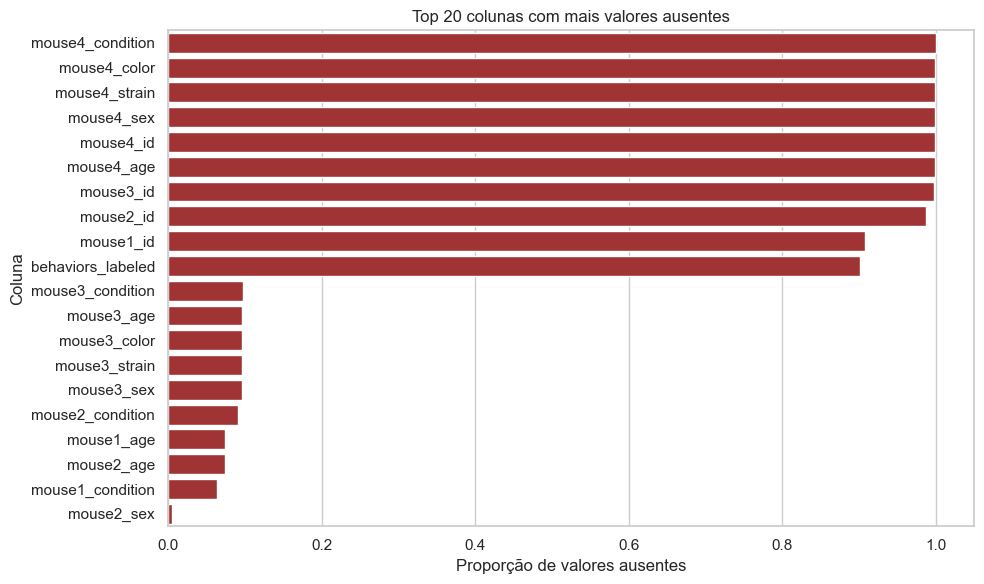

In [43]:
missing_ratio = train.isna().mean().sort_values(ascending=False)
top_missing = missing_ratio.head(20)
if top_missing.gt(0).any():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_missing.values, y=top_missing.index, orient='h', color='firebrick')
    plt.xlabel('Proporção de valores ausentes')
    plt.ylabel('Coluna')
    plt.title('Top 20 colunas com mais valores ausentes')
    plt.tight_layout()
else:
    print('Nenhuma coluna com valores ausentes.')


## Construção do Dataset para *Unique Actions*

O primeiro passo do treinamento consiste na preparação das **anotações frame a frame** dos vídeos, transformando-as em rótulos mais compactos que possam ser utilizados em nível de vídeo.

### Estruturação das Anotações

1. **Construção do índice de anotações (`annotation_index`)**  
   - Cada vídeo (`lab_id`, `video_id`) foi associado ao caminho esperado para seu arquivo `.parquet` de anotações.  
   - Foi criada a coluna `exists` indicando se o arquivo de anotações está disponível no diretório correspondente.  
   - Esse passo garante rastreabilidade entre vídeos e suas anotações detalhadas.

2. **Extração de informações principais por vídeo**  
   - Para cada vídeo com anotações disponíveis:  
     - **`unique_actions`**: número total de ações distintas identificadas.  
     - **`top_action`**: ação mais frequente (modo estatístico) observada no vídeo.  
   - Para vídeos sem anotações ou sem coluna de ação, foram atribuídos valores padrão (`unique_actions = 0`, `top_action = None`).

3. **Schema de Anotações (`annotation_schema`)**  
   - Resultado consolidado em um `DataFrame` com as seguintes colunas:  
     - `lab_id`, `video_id`  
     - `top_action` → variável categórica alvo para predição da ação predominante.  
     - `unique_actions` → variável numérica alvo para predição do número de ações distintas.  

In [44]:
annotation_index = (
    train[['lab_id', 'video_id']]
    .drop_duplicates()
    .assign(parquet_path=lambda df: [ANNOTATION_DIR / lab / (str(video) + '.parquet') for lab, video in df[['lab_id', 'video_id']].itertuples(index=False)])
)
annotation_index['exists'] = annotation_index['parquet_path'].apply(lambda p: p.exists())

annotation_records = []
for row in annotation_index.itertuples(index=False):
    record = {'lab_id': row.lab_id, 'video_id': row.video_id, 'top_action': None, 'unique_actions': 0}
    if row.exists:
        df_ann = pd.read_parquet(row.parquet_path)
        if 'action' in df_ann.columns:
            actions = df_ann['action'].dropna().astype(str)
            if not actions.empty:
                record['unique_actions'] = int(actions.nunique())
                record['top_action'] = actions.mode().iloc[0]
    annotation_records.append(record)

annotation_schema = pd.DataFrame(annotation_records)
display(annotation_schema.head())


,lab_id,video_id,top_action,unique_actions
0,AdaptableSnail,44566106,rear,7
1,AdaptableSnail,143861384,attack,4
2,AdaptableSnail,209576908,rear,7
3,AdaptableSnail,278643799,rear,7
4,AdaptableSnail,351967631,rear,7


### Distribuição das Classes (`top_action`)
Para avaliar **balanceamento de classes**, foi computada a distribuição de `top_action`:

- Tabela com **contagem absoluta** por classe e **percentual** relativo.
- Visualização com **gráfico de barras horizontal**, destacando as classes mais frequentes.

,top_action,contagem,percentual
15,sniff,510,59.10
1,attack,94,10.89
16,sniffbody,92,10.66
18,sniffgenital,27,3.13
11,rear,23,2.67
7,escape,22,2.55
12,reciprocalsniff,20,2.32
10,mount,13,1.51
5,defend,13,1.51
8,follow,12,1.39


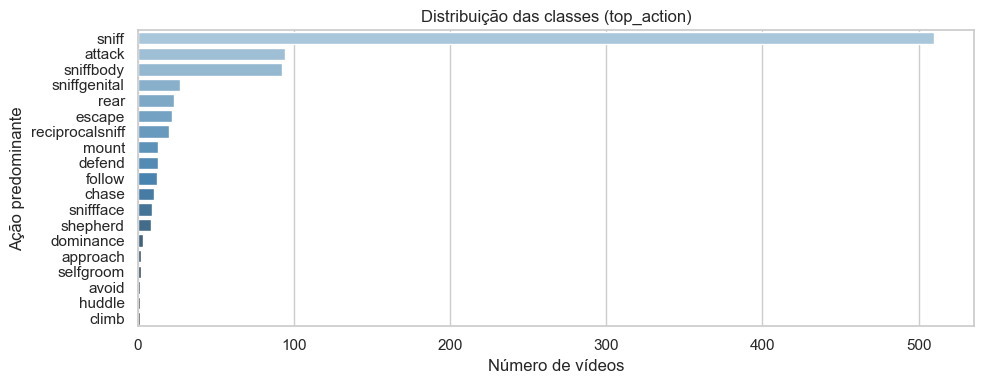

In [45]:
class_distribution = (
    annotation_schema
    .dropna(subset=['top_action'])
    .groupby('top_action', as_index=False)
    .size()
    .rename(columns={'size': 'contagem'})
    .assign(percentual=lambda df: (df['contagem'] / df['contagem'].sum() * 100).round(2))
    .sort_values('contagem', ascending=False)
)
display(class_distribution)

plt.figure(figsize=(10, 4))
sns.barplot(
    data=class_distribution,
    x='contagem',
    y='top_action',
    hue='top_action',          
    dodge=False,              
    legend=False,              
    orient='h',
    palette='Blues_d'
)
plt.xlabel('Número de vídeos')
plt.ylabel('Ação predominante')
plt.title('Distribuição das classes (top_action)')
plt.tight_layout()
plt.show()

## Considerações da Análise

- Colunas faltantes predominantemente sendo informações específicas de alguns ratos, principalmente dos mouse_3 e mouse_4, menos presentes nos vídeos e ações, portanto valores faltantes foram tratados pela média e moda, gerando mais coesão aos dados.
- Coluna Target consideravelmente desbalanceada.

## Montagem do Dataset para Predição de UniqueActions

Após a extração das anotações, foi necessário alinhar as informações de movimento dos camundongos (features de tracking) com os rótulos definidos anteriormente (`unique_actions`).

### Adição das Features de Tracking
- Foi utilizada a função de `BuildTrackingFeatures` para gerar Features considerando os dados de tracking.

### Pré-processamento das Features
- Foi utilizada a classe `TrackingFeaturePreprocessor` para:
  - Normalizar variáveis numéricas para o intervalo [-1, 1].
  - Codificar variáveis categóricas em formato one-hot.
  - Construir uma matriz de atributos consistente entre treino e inferência.

O resultado é o **`train_tracking_features`**, que contém para cada vídeo:
- Colunas-chave (`lab_id`, `video_id`).  
- Estatísticas de movimento normalizadas.  
- Atributos categóricos transformados em vetores binários.

### Construção do Dataset de Treinamento
1. As features processadas foram integradas ao `annotation_schema`, adicionando a coluna de rótulo `unique_actions`.  
2. Foram descartados vídeos sem informação válida de ações (valores nulos).  
3. A coluna `unique_actions` foi convertida para inteiro, representando o **número de ações distintas identificadas em cada vídeo**.  

### Codificação das Classes
- Foi criado um mapeamento **valor → índice** (`count_to_idx`) e **índice → valor** (`idx_to_count`), garantindo compatibilidade entre rótulos originais e representação numérica exigida pelo modelo.  
- Essa codificação permite tratar a variável-alvo como problema de **classificação multiclasse**, em vez de regressão pura.  

### Matrizes Finais
- **`X`**: matriz de features numéricas (`float64`).  
- **`y`**: vetor de rótulos discretizados (`int`).  

Essas estruturas formam a base para o **treinamento do primeiro modelo MLP voltado à predição de `unique_actions`**.


In [46]:
preprocessor = TrackingFeaturePreprocessor()

train_tracking_features_raw = build_tracking_features(train, TRACKING_DIR)
train_tracking_features = preprocessor.fit_transform(train_tracking_features_raw)

print('Shape das features de treino:', train_tracking_features.shape)
display(train_tracking_features.head())

Shape das features de treino: (8790, 169)


,lab_id,video_id,mouse1_age,mouse2_age,mouse3_age,mouse4_age,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,total_frames,mean_movement_mouse1_body_center,mean_movement_mouse1_ear_left,mean_movement_mouse1_ear_right,mean_movement_mouse1_headpiece_bottombackleft,mean_movement_mouse1_headpiece_bottombackright,mean_movement_mouse1_headpiece_bottomfrontleft,mean_movement_mouse1_headpiece_bottomfrontright,mean_movement_mouse1_headpiece_topbackleft,mean_movement_mouse1_headpiece_topbackright,mean_movement_mouse1_headpiece_topfrontleft,mean_movement_mouse1_headpiece_topfrontright,mean_movement_mouse1_lateral_left,mean_movement_mouse1_lateral_right,mean_movement_mouse1_neck,mean_movement_mouse1_nose,mean_movement_mouse1_tail_base,mean_movement_mouse1_tail_midpoint,mean_movement_mouse1_tail_tip,mean_movement_mouse2_body_center,mean_movement_mouse2_ear_left,mean_movement_mouse2_ear_right,mean_movement_mouse2_headpiece_bottombackleft,mean_movement_mouse2_headpiece_bottombackright,mean_movement_mouse2_headpiece_bottomfrontleft,mean_movement_mouse2_headpiece_bottomfrontright,mean_movement_mouse2_headpiece_topbackleft,mean_movement_mouse2_headpiece_topbackright,mean_movement_mouse2_headpiece_topfrontleft,mean_movement_mouse2_headpiece_topfrontright,mean_movement_mouse2_lateral_left,mean_movement_mouse2_lateral_right,mean_movement_mouse2_neck,mean_movement_mouse2_nose,mean_movement_mouse2_tail_base,mean_movement_mouse2_tail_midpoint,mean_movement_mouse2_tail_tip,...,mouse1_strain_c57bl_6j,mouse1_strain_c57bl_6j_x_ai148,mouse1_strain_c57bl_6n,mouse1_strain_cd_1__icr,mouse1_strain_cd1,mouse1_strain_cfw,mouse1_color_black,mouse1_color_black_and_tan,mouse1_color_brown,mouse1_color_white,mouse1_sex_female,mouse1_sex_male,mouse2_strain_129_svevtac,mouse2_strain_balb_c,mouse2_strain_btbr,mouse2_strain_c57bl_6j,mouse2_strain_c57bl_6n,mouse2_strain_cd_1__icr,mouse2_strain_cd1,mouse2_strain_cfw,mouse2_color_black,mouse2_color_black_and_tan,mouse2_color_brown,mouse2_color_white,mouse2_sex_female,mouse2_sex_male,mouse3_strain_btbr,mouse3_strain_c57bl_6j,mouse3_strain_cd_1__icr,mouse3_color_black,mouse3_color_black_and_tan,mouse3_color_white,mouse3_sex_male,mouse4_strain_cd_1__icr,mouse4_color_white,mouse4_sex_male,mouse4_condition_wireless_device,arena_shape_circular,arena_shape_rectangular,arena_shape_split_rectangluar,arena_shape_square,arena_type_csds,arena_type_divided_territories,arena_type_familiar,arena_type_neutral,arena_type_resident_intruder,tracking_method_deeplabcut,tracking_method_mars,tracking_method_sleap,tracking_method_custom_hrnet
0,AdaptableSnail,44566106,-0.875,-0.636364,-1.0,0.0,-0.636430,-0.939683,-0.647059,0.061785,-0.061224,-0.11836,-0.111111,-0.939759,-0.960432,-0.948686,-0.951348,0.459698,0.625304,1.000000,0.849507,0.818705,0.656221,0.959277,0.814653,-0.783642,-0.776518,-0.997528,-0.938540,-0.956437,-0.941935,-0.880600,-0.964879,-0.954465,-0.956896,0.346775,-0.217390,1.000000,0.087506,0.168588,-0.007170,0.024077,0.145082,-0.851819,-0.851773,-0.976947,-0.945099,-0.964225,-0.953431,-0.906248,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,AdaptableSnail,143861384,-0.875,-0.636364,-1.0,0.0,-0.727322,-0.638055,-0.858824,-0.235698,-0.555317,-0.11836,-0.111111,-0.699761,-0.975767,-0.969271,-0.968166,-0.181315,-0.082663,-0.121918,-0.028470,-0.071601,-0.111757,-0.074174,-0.023978,-0.902197,-0.896337,-0.985371,-0.963143,-0.970407,-0.962360,-0.951715,-0.982981,-0.979380,-0.979619,-0.170346,-0.210071,-0.008683,-0.172426,-0.108358,-0.168676,-0.194576,-0.123404,-0.948036,-0.944909,-0.994420,-0.972623,-0.982051,-0.979887,-0.974322,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1

In [47]:
feature_cols = [c for c in train_tracking_features.columns if c not in ('lab_id', 'video_id', 'mouse1_id', 'mouse2_id', 'mouse_3_id', 'mouse4_id', 'body_parts_tracked', 'behaviors_labeled')]
training_dataset = train_tracking_features.merge(annotation_schema[['lab_id', 'video_id', 'unique_actions']], on=['lab_id', 'video_id'], how='inner')
training_dataset = training_dataset.dropna(subset=['unique_actions']).copy()
training_dataset['unique_actions'] = training_dataset['unique_actions'].astype(int)

counts = sorted(training_dataset['unique_actions'].unique())
count_to_idx = {count: idx for idx, count in enumerate(counts)}
idx_to_count = {idx: count for count, idx in count_to_idx.items()}

X = training_dataset[feature_cols].to_numpy(dtype=np.float64)
y = training_dataset['unique_actions'].map(count_to_idx).to_numpy(dtype=int)

## Treinamento do Modelo para Predição de *Unique Actions*

Com o dataset de features (`X`) e rótulos (`y`) montado, foi possível iniciar o treinamento do primeiro modelo MLP.

### Divisão em Conjuntos de Treino e Validação
- Foi realizada uma separação em **80% para treino**, **15% para teste** e **15% para validação**.  
- A divisão foi embaralhada e controlada por uma semente fixa (`random_state=42`), assegurando reprodutibilidade.  

### Preparação dos Dados
- As matrizes de treino e validação foram convertidas explicitamente para `numpy.ndarray` no tipo adequado.  
- Essa padronização evita inconsistências durante o treinamento e a inferência.

### Configuração do Modelo MLP
O modelo inicial (baseline) foi definido com os seguintes parâmetros:
- **Camadas escondidas**: [128, 64, 32] neurônios.     
- **Taxa de aprendizado (`lr`)**: 0.05.  
- **Número máximo de épocas**: 3000.  
- **Tamanho do lote (`batch_size`)**: 64.  
- **Regularização L2**: 0.01.   

### Avaliação Inicial
Após o treinamento, foram gerados:
- **Predições de probabilidade** (`predict_proba`) para treino e validação.  
- **Classes previstas** (`argmax`) para cada exemplo.  
- **Cálculo da acurácia** em ambos os conjuntos.  

In [48]:
X_train, X_valid, X_test, y_train, y_valid, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    val_size=0.15,
    random_state=42,
)

X_train_np = to_numpy_array(X_train, dtype=np.float64)
X_valid_np = to_numpy_array(X_valid, dtype=np.float64)
X_test_np = to_numpy_array(X_test, dtype=np.float64)
y_train_np = to_numpy_array(y_train, dtype=int)
y_valid_np = to_numpy_array(y_valid, dtype=int)
y_test_np = to_numpy_array(y_test, dtype=int)

baseline_model = train_mlp_classifier(
    X_train_np,
    y_train_np,
    hidden_layers=[128, 64, 32],
    output_dim=len(counts),
    lr=0.05,
    max_epochs=3000,
    batch_size=64,
    random_state=42,
    l2=0.01,
    track_history=True,
)

proba_train = baseline_model.predict_proba(X_train_np)
proba_test = baseline_model.predict_proba(X_test_np)

pred_train = proba_train.argmax(axis=1)
pred_test = proba_test.argmax(axis=1)

train_acc = accuracy_score(y_train_np, pred_train)
test_acc = accuracy_score(y_test_np, pred_test)

print(f'Acuracia (treino): {train_acc:.3f}')
print(f'Acuracia (teste): {test_acc:.3f}')


Acuracia (treino): 0.955
Acuracia (teste): 0.946


## Curvas de Aprendizado: Histórico de Loss

Para compreender o comportamento do treinamento do MLP, foi gerada a curva de evolução da **função de perda (loss)** ao longo das épocas.

### Objetivo da Visualização
- Avaliar se o modelo converge adequadamente durante o processo de otimização.  
- Identificar padrões de **underfitting** ou **overfitting**.

### Resultados
- O gráfico exibe a perda média por época durante o treinamento.  
- A análise da curva fornece indícios de:
  - **Convergência estável** → redução consistente da perda ao longo das épocas.  
  - **Estagnação** → ausência de melhora após certo número de épocas, sugerindo que o modelo atingiu seu limite com a configuração atual.  

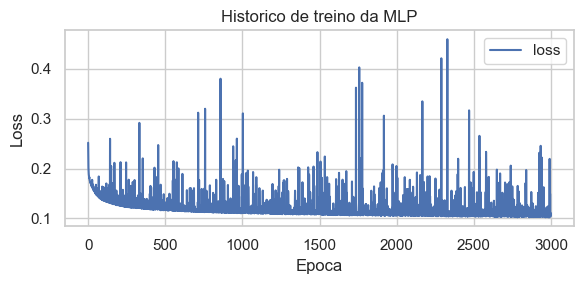

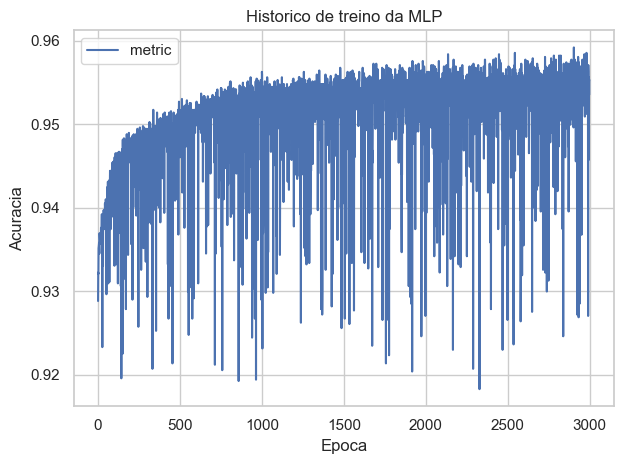

In [49]:
if baseline_model.track_history and baseline_model.loss_history_ and baseline_model.acc_history_:
    plt.figure(figsize=(6, 3))
    plt.plot(baseline_model.loss_history_, label='loss')
    plt.xlabel('Epoca')
    plt.ylabel('Loss')
    plt.title('Historico de treino da MLP')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.plot(baseline_model.acc_history_, label='metric')
    plt.xlabel('Epoca')
    plt.ylabel('Acuracia')
    plt.title('Historico de treino da MLP')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('Historico de loss indisponivel.')


## Treinamento Final e Consolidação do Dataset

Após a fase de validação, foi realizado o **treinamento definitivo do modelo de predição de `unique_actions`**, utilizando **toda a base disponível**.  
Esse modelo mais profundo permite capturar com mais dados o padrão de `unique_actions` por vídeo, possibilitando melhor utilização da resposta como feature futura.

### Montagem do Dataset Final
Com o modelo treinado, foi montado um **dataset consolidado** para as próximas etapas:

### Resultado Final
O dataset consolidado (`full_unique_df`) contém:
- Identificação dos vídeos (`lab_id`, `video_id`).  
- Features numéricas e categóricas derivadas do tracking.  
- Coluna `unique_actions` (observada ou imputada).  
- Coluna `unique_actions_scaled`, padronizada para análises futuras.  

Esse dataset representa o **ponto de transição entre a etapa de predição de quantidade de ações (`unique_actions`) e a próxima fase de modelagem**, focada na **predição da ação mais realizada (`top_action`)**.


In [50]:
X_train_full = np.vstack([X_train_np, X_test_np])
y_train_full = np.concatenate([y_train_np, y_test_np])

full_model = train_mlp_classifier(
    X_train_full,
    y_train_full,
    hidden_layers=[128, 64, 32],
    output_dim=len(counts),
    lr=0.05,
    max_epochs=3000,
    batch_size=64,
    random_state=42,
    l2=0.01,
    track_history=True,
)

pred_full_train = full_model.predict(X_train_full)
pred_full_valid = full_model.predict(X_valid_np)


In [51]:
train_full_acc = accuracy_score(y_train_full, pred_full_train)
valid_full_acc = accuracy_score(y_valid_np, pred_full_valid)
print(f'Acuracia (full model - validacao): {valid_full_acc:.3f}')
metrics = precision_recall_f1(y_train_full, pred_full_train, labels=np.unique(y_train_full))
for label, vals in metrics.items():
    print(f"Classe {label}: "
          f"precision={vals['precision']:.3f}, "
          f"recall={vals['recall']:.3f}, "
          f"f1={vals['f1']:.3f}")

cm = confusion_matrix_true(y_train_full, pred_full_train)
print("\nMatriz de confusão")
print(cm)

Acuracia (full model - validacao): 0.946
Classe 0: precision=1.000, recall=1.000, f1=1.000
Classe 1: precision=0.695, recall=0.512, f1=0.590
Classe 2: precision=0.519, recall=0.911, f1=0.661
Classe 3: precision=0.553, recall=0.302, f1=0.391
Classe 4: precision=0.567, recall=0.376, f1=0.452
Classe 5: precision=0.553, recall=0.441, f1=0.491
Classe 6: precision=0.750, recall=0.559, f1=0.641
Classe 7: precision=0.900, recall=0.500, f1=0.643
Classe 8: precision=1.000, recall=1.000, f1=1.000
Classe 9: precision=0.000, recall=0.000, f1=0.000
Classe 10: precision=0.875, recall=1.000, f1=0.933
Classe 11: precision=1.000, recall=1.000, f1=1.000
Classe 12: precision=1.000, recall=0.500, f1=0.667
Classe 13: precision=0.000, recall=0.000, f1=0.000
Classe 14: precision=0.000, recall=0.000, f1=0.000
Classe 15: precision=0.000, recall=0.000, f1=0.000
Classe 16: precision=0.300, recall=1.000, f1=0.462

Matriz de confusão
      0   1    2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   6733

In [52]:
full_feature_df = train_tracking_features[['lab_id', 'video_id'] + feature_cols].copy()
labels_df = annotation_schema[['lab_id', 'video_id', 'unique_actions']].copy()
full_unique_df = full_feature_df.merge(labels_df, on=['lab_id', 'video_id'], how='left')

missing_mask = full_unique_df['unique_actions'].isna()
if missing_mask.any():
    X_missing = to_numpy_array(full_unique_df.loc[missing_mask, feature_cols], dtype=np.float64)
    preds_missing = full_model.predict(X_missing)
    full_unique_df.loc[missing_mask, 'unique_actions'] = [idx_to_count[int(idx)] for idx in preds_missing]

full_unique_df['unique_actions'] = full_unique_df['unique_actions'].astype(int)
print('Dataset final (videos x colunas):', full_unique_df.shape)
display(full_unique_df.head())


Dataset final (videos x colunas): (8790, 170)


,lab_id,video_id,mouse1_age,mouse2_age,mouse3_age,mouse4_age,frames_per_second,video_duration_sec,pix_per_cm_approx,video_width_pix,video_height_pix,arena_width_cm,arena_height_cm,total_frames,mean_movement_mouse1_body_center,mean_movement_mouse1_ear_left,mean_movement_mouse1_ear_right,mean_movement_mouse1_headpiece_bottombackleft,mean_movement_mouse1_headpiece_bottombackright,mean_movement_mouse1_headpiece_bottomfrontleft,mean_movement_mouse1_headpiece_bottomfrontright,mean_movement_mouse1_headpiece_topbackleft,mean_movement_mouse1_headpiece_topbackright,mean_movement_mouse1_headpiece_topfrontleft,mean_movement_mouse1_headpiece_topfrontright,mean_movement_mouse1_lateral_left,mean_movement_mouse1_lateral_right,mean_movement_mouse1_neck,mean_movement_mouse1_nose,mean_movement_mouse1_tail_base,mean_movement_mouse1_tail_midpoint,mean_movement_mouse1_tail_tip,mean_movement_mouse2_body_center,mean_movement_mouse2_ear_left,mean_movement_mouse2_ear_right,mean_movement_mouse2_headpiece_bottombackleft,mean_movement_mouse2_headpiece_bottombackright,mean_movement_mouse2_headpiece_bottomfrontleft,mean_movement_mouse2_headpiece_bottomfrontright,mean_movement_mouse2_headpiece_topbackleft,mean_movement_mouse2_headpiece_topbackright,mean_movement_mouse2_headpiece_topfrontleft,mean_movement_mouse2_headpiece_topfrontright,mean_movement_mouse2_lateral_left,mean_movement_mouse2_lateral_right,mean_movement_mouse2_neck,mean_movement_mouse2_nose,mean_movement_mouse2_tail_base,mean_movement_mouse2_tail_midpoint,mean_movement_mouse2_tail_tip,...,mouse1_strain_c57bl_6j_x_ai148,mouse1_strain_c57bl_6n,mouse1_strain_cd_1__icr,mouse1_strain_cd1,mouse1_strain_cfw,mouse1_color_black,mouse1_color_black_and_tan,mouse1_color_brown,mouse1_color_white,mouse1_sex_female,mouse1_sex_male,mouse2_strain_129_svevtac,mouse2_strain_balb_c,mouse2_strain_btbr,mouse2_strain_c57bl_6j,mouse2_strain_c57bl_6n,mouse2_strain_cd_1__icr,mouse2_strain_cd1,mouse2_strain_cfw,mouse2_color_black,mouse2_color_black_and_tan,mouse2_color_brown,mouse2_color_white,mouse2_sex_female,mouse2_sex_male,mouse3_strain_btbr,mouse3_strain_c57bl_6j,mouse3_strain_cd_1__icr,mouse3_color_black,mouse3_color_black_and_tan,mouse3_color_white,mouse3_sex_male,mouse4_strain_cd_1__icr,mouse4_color_white,mouse4_sex_male,mouse4_condition_wireless_device,arena_shape_circular,arena_shape_rectangular,arena_shape_split_rectangluar,arena_shape_square,arena_type_csds,arena_type_divided_territories,arena_type_familiar,arena_type_neutral,arena_type_resident_intruder,tracking_method_deeplabcut,tracking_method_mars,tracking_method_sleap,tracking_method_custom_hrnet,unique_actions
0,AdaptableSnail,44566106,-0.875,-0.636364,-1.0,0.0,-0.636430,-0.939683,-0.647059,0.061785,-0.061224,-0.11836,-0.111111,-0.939759,-0.960432,-0.948686,-0.951348,0.459698,0.625304,1.000000,0.849507,0.818705,0.656221,0.959277,0.814653,-0.783642,-0.776518,-0.997528,-0.938540,-0.956437,-0.941935,-0.880600,-0.964879,-0.954465,-0.956896,0.346775,-0.217390,1.000000,0.087506,0.168588,-0.007170,0.024077,0.145082,-0.851819,-0.851773,-0.976947,-0.945099,-0.964225,-0.953431,-0.906248,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7
1,AdaptableSnail,143861384,-0.875,-0.636364,-1.0,0.0,-0.727322,-0.638055,-0.858824,-0.235698,-0.555317,-0.11836,-0.111111,-0.699761,-0.975767,-0.969271,-0.968166,-0.181315,-0.082663,-0.121918,-0.028470,-0.071601,-0.111757,-0.074174,-0.023978,-0.902197,-0.896337,-0.985371,-0.963143,-0.970407,-0.962360,-0.951715,-0.982981,-0.979380,-0.979619,-0.170346,-0.210071,-0.008683,-0.172426,-0.108358,-0.168676,-0.194576,-0.123404,-0.948036,-0.944909,-0.994420,-0.972623,-0.982051,-0.979887,-0.974322,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0

In [53]:
min_unique = full_unique_df['unique_actions'].min()
max_unique = full_unique_df['unique_actions'].max()
if max_unique > min_unique:
    full_unique_df['unique_actions_scaled'] = 2 * (full_unique_df['unique_actions'] - min_unique) / (max_unique - min_unique) - 1
else:
    full_unique_df['unique_actions_scaled'] = 0.0

print('Intervalo original:', min_unique, '->', max_unique)
print('Intervalo escalonado:', full_unique_df['unique_actions_scaled'].min(), '->', full_unique_df['unique_actions_scaled'].max())


Intervalo original: 0 -> 17
Intervalo escalonado: -1.0 -> 1.0


## Treinamento do Modelo para Predição da Ação Predominante (*Top Action*)

Após consolidar o dataset de `unique_actions`, o próximo objetivo foi treinar um modelo MLP para prever a **ação mais realizada em cada vídeo**.  
Esse passo amplia a complexidade da tarefa, passando de uma contagem de ações para uma **classificação multiclasse** das categorias de comportamento observadas.

### Construção do Conjunto de Treinamento
1. Foram extraídas as anotações disponíveis de `top_action` no `annotation_schema`.  
2. O dataset consolidado (`full_unique_df`) foi unido às labels, resultando em `full_actions_df`.  
3. Casos com `top_action` ausente foram descartados da etapa de treino, mantendo apenas vídeos com anotações válidas.  

### Codificação das Classes
- A variável categórica `top_action` foi convertida em rótulos numéricos usando `pd.factorize`.  
- Foi gerada a lista `action_levels` com os nomes originais das classes, garantindo a rastreabilidade entre índices numéricos e labels.  

### Configuração do Modelo MLP
O modelo inicial (baseline) foi definido com os seguintes parâmetros:
- **Camadas escondidas**: [128, 64, 32] neurônios.     
- **Taxa de aprendizado (`lr`)**: 0.05.  
- **Número máximo de épocas**: 3000.  
- **Tamanho do lote (`batch_size`)**: 64.  
- **Regularização L2**: 0.01.  

### Predições e Consolidação
1. O modelo treinado foi aplicado em todos os vídeos (`X_all_actions`).  
2. Foram geradas as predições (`pred_top_action`) e atribuídas labels correspondentes.  
3. Foi criada a coluna `most_frequent_action`, que preserva o valor anotado quando disponível e, em caso de ausência, utiliza a predição do modelo.  
4. As colunas adicionadas ao dataset final (`full_unique_df`) foram:  
   - `top_action`: anotação original (quando presente).  
   - `pred_top_action`: resultado do modelo.  

In [54]:

action_labels = annotation_schema[['lab_id', 'video_id', 'top_action']].dropna(subset=['top_action']).copy()
full_actions_df = full_unique_df.merge(action_labels, on=['lab_id', 'video_id'], how='left')
observed_mask = full_actions_df['top_action'].notna()

if observed_mask.sum() == 0:
    raise RuntimeError('Nenhuma acao predominante disponivel para treinamento.')

y_action_raw = full_actions_df.loc[observed_mask, 'top_action']
y_action_codes, action_levels = pd.factorize(y_action_raw, sort=True)
action_levels = list(action_levels)

X_action = to_numpy_array(full_actions_df.loc[observed_mask, feature_cols], dtype=np.float64)
y_action = to_numpy_array(y_action_codes, dtype=int)
X_tr_act, X_va_act, X_te_act, y_tr_act, y_va_act, y_te_act = train_test_split(
    X_action,
    y_action,
    test_size=0.15,
    val_size=0.15,
    random_state=42,
)

action_model = train_mlp_classifier(
    X_tr_act,
    y_tr_act,
    hidden_layers=[128, 64, 32],
    output_dim=len(action_levels),
    lr=0.05,
    max_epochs=3000,
    batch_size=64,
    random_state=42,
    l2=0.01,
    track_history=True,
)

pred_tr = action_model.predict(X_tr_act)
pred_te = action_model.predict(X_te_act)
print('Acuracia (treino):', accuracy_score(y_tr_act, pred_tr))
print('Acuracia (teste):', accuracy_score(y_te_act, pred_te))

Acuracia (treino): 0.8743801652892562
Acuracia (teste): 0.7906976744186046


In [55]:
X_train_full_act = np.vstack([X_tr_act, X_te_act])
y_train_full_act = np.concatenate([y_tr_act, y_te_act])
action_full_model = train_mlp_classifier(
    X_train_full_act,
    y_train_full_act,
    hidden_layers=[128, 64, 32],
    output_dim=len(action_levels),
    lr=0.05,
    max_epochs=3000,
    batch_size=64,
    random_state=42,
    l2=0.01,
    track_history=True,
)

pred_va_full = action_full_model.predict(X_va_act)

In [56]:
print('Acuracia (full model - validacao):', accuracy_score(y_va_act, pred_va_full))
metrics = precision_recall_f1(y_va_act, pred_va_full, labels=np.unique(y_va_act))
for label, vals in metrics.items():
    print(f"Classe {label}: "
          f"precision={vals['precision']:.3f}, "
          f"recall={vals['recall']:.3f}, "
          f"f1={vals['f1']:.3f}")

cm = confusion_matrix_true(y_va_act, pred_va_full)
print("\nMatriz de confusão")
print(cm)

Acuracia (full model - validacao): 0.6434108527131783
Classe 0: precision=0.000, recall=0.000, f1=0.000
Classe 1: precision=0.722, recall=0.619, f1=0.667
Classe 3: precision=0.000, recall=0.000, f1=0.000
Classe 4: precision=0.000, recall=0.000, f1=0.000
Classe 5: precision=0.333, recall=1.000, f1=0.500
Classe 7: precision=0.333, recall=0.600, f1=0.429
Classe 8: precision=0.000, recall=0.000, f1=0.000
Classe 9: precision=0.000, recall=0.000, f1=0.000
Classe 10: precision=0.000, recall=0.000, f1=0.000
Classe 11: precision=0.333, recall=0.250, f1=0.286
Classe 12: precision=0.667, recall=0.500, f1=0.571
Classe 15: precision=0.778, recall=0.889, f1=0.830
Classe 16: precision=0.556, recall=0.312, f1=0.400
Classe 18: precision=0.286, recall=0.400, f1=0.333

Matriz de confusão
    0   1   3   4   5   7   8   9   10  11  12  13  15  16  17  18
0    0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
1    0  13   1   0   0   1   1   0   0   0   0   0   3   2   0   0
3    0   1   0   0 

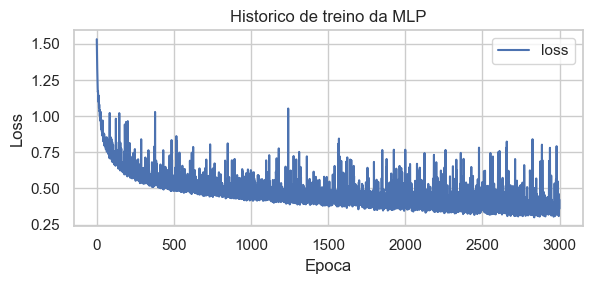

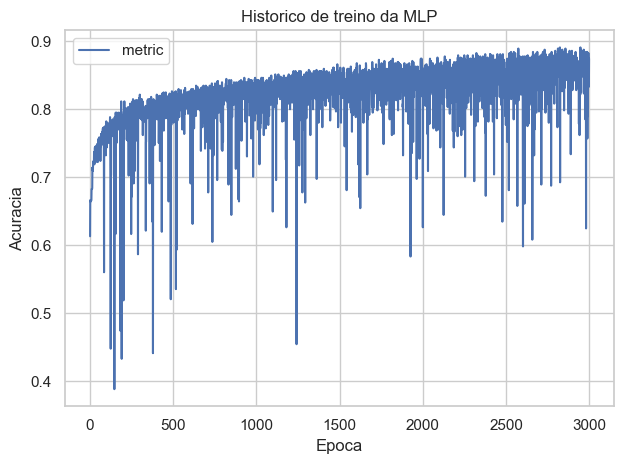

In [57]:
if action_model.track_history and action_model.loss_history_ and action_model.acc_history_:
    plt.figure(figsize=(6, 3))
    plt.plot(action_model.loss_history_, label='loss')
    plt.xlabel('Epoca')
    plt.ylabel('Loss')
    plt.title('Historico de treino da MLP')
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.plot(action_model.acc_history_, label='metric')
    plt.xlabel('Epoca')
    plt.ylabel('Acuracia')
    plt.title('Historico de treino da MLP')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print('Historico de loss indisponivel.')

## Considerações Finais

## Parâmetros Utilizados
- **Regularização l2** - utilizada para corrigir overfitting (accuracy da validação consideravelmente inferior).
- **Épocas** - valor decidido analisando estabilidade das curvas de erro e accuracy.
- **Batches** - valor de 64 para mini-batches providenciando balanceamento entre velocidade e precisão.
- **Camadas Ocultas** - valores escolhidos para otimizar a precisão e velocidade de treinamento.
- **Softmax** - camada de saída com softmax para otimização e redução de ambiguidade em problemas multiclasses.

## Limitações e Melhorias Futuras
- **Previsão por vídeo** - a simplificação realizada não considera as diferentes ações que podem ocorrer em distintos espaços temporais do vídeo, não cumprindo a proposta da competição corretamente.
- **Previsão por Frame** - utilização de previsão por frame ou batches de frames para cumprir a proposta da competição de maneira correta.
- **Estruturas de Dados Inteligentes** - adaptar a MLP e utilização dos dados para implementação de previsão por frame, possibilitando otimização do uso da RAM ao comportar datasets exponencialmente maiores, como é o caso considerando os frames de cada vídeo.
- **Previsão dos agentes** - para cumprir a proposta final da competição, realizar também a previsão dos atores (rato agente e rato passivo) em cada uma das ações previstas.